# HW3 Support Vector Machine and Decision Trees

# Due on 11/30 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load from file
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [3]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel with usual steps

Type your code here

In [4]:
#import the model from sklearn import svm, create the SVC object 
#model = svm.SVC()
#Call Train test split
#print out model performance
from sklearn import svm
from sklearn.model_selection import train_test_split

In [5]:
model = svm.SVC(kernel= 'linear')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1), df['had_affair'], test_size=0.20, random_state=101)
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.67      1274

0.707221350078493


so the accuracy score is 70 % 

### Question 2. Now try different value of C-parameter and rerun your model

Type your code here

In [8]:
# Try C = 2**-5 and 2**5
model = svm.SVC(kernel= 'linear', C = 2**5 )
X_train, X_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1), df['had_affair'], test_size=0.20, random_state=101)
model.fit(X_train,y_train)

SVC(C=32, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
prediction = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.66      1274

0.7056514913657771


In [10]:
model = svm.SVC(kernel= 'linear', C = 2**-5 )
X_train, X_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1), df['had_affair'], test_size=0.20, random_state=101)
model.fit(X_train,y_train)

SVC(C=0.03125, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
prediction = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       850
           1       0.64      0.25      0.36       424

    accuracy                           0.70      1274
   macro avg       0.68      0.59      0.59      1274
weighted avg       0.69      0.70      0.66      1274

0.7048665620094191


### Question 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2

In [12]:
model = svm.SVC(kernel= 'rbf', C = 2**-5)
X_train, X_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1), df['had_affair'], test_size=0.20, random_state=101)
model.fit(X_train,y_train)

SVC(C=0.03125, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
prediction = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       850
           1       0.00      0.00      0.00       424

    accuracy                           0.67      1274
   macro avg       0.33      0.50      0.40      1274
weighted avg       0.45      0.67      0.53      1274

0.6671899529042387


In [14]:
model = svm.SVC(kernel= 'rbf', C = 0.1)
X_train, X_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1), df['had_affair'], test_size=0.20, random_state=101)
model.fit(X_train,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
prediction = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       850
           1       0.00      0.00      0.00       424

    accuracy                           0.67      1274
   macro avg       0.33      0.50      0.40      1274
weighted avg       0.45      0.67      0.53      1274

0.6671899529042387


In [16]:
model = svm.SVC(kernel= 'rbf', C = 1)
X_train, X_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1), df['had_affair'], test_size=0.20, random_state=101)
model.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
prediction = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81       850
           1       0.73      0.16      0.27       424

    accuracy                           0.70      1274
   macro avg       0.71      0.57      0.54      1274
weighted avg       0.71      0.70      0.63      1274

0.7009419152276295


In [18]:
model = svm.SVC(kernel= 'rbf', C = 2)
X_train, X_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1), df['had_affair'], test_size=0.20, random_state=101)
model.fit(X_train,y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
prediction = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.70      0.95      0.81       850
           1       0.68      0.19      0.30       424

    accuracy                           0.70      1274
   macro avg       0.69      0.57      0.55      1274
weighted avg       0.69      0.70      0.64      1274

0.7001569858712716


### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters?

Kernel = rbf and c= 1 is the best choice

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

Type your code here

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1), df['had_affair'], test_size=0.20, random_state=101)
model.fit(X_train,y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
prediction = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       850
           1       0.45      0.39      0.42       424

    accuracy                           0.64      1274
   macro avg       0.58      0.57      0.58      1274
weighted avg       0.62      0.64      0.63      1274

0.6350078492935636


### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

In [21]:
model = DecisionTreeClassifier(max_depth=2, criterion='gini')
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       850
           1       0.61      0.32      0.42       424

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.61      1274
weighted avg       0.69      0.71      0.67      1274

0.7056514913657771


In [22]:
model = DecisionTreeClassifier(max_depth=3, criterion='gini')
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       850
           1       0.56      0.35      0.43       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

0.6915227629513344


In [23]:
model = DecisionTreeClassifier(max_depth=4, criterion='gini')
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       850
           1       0.60      0.32      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.68      0.70      0.67      1274

0.7025117739403454


In [24]:
model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       850
           1       0.61      0.32      0.42       424

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.61      1274
weighted avg       0.69      0.71      0.67      1274

0.7056514913657771


In [25]:
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       850
           1       0.56      0.35      0.43       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

0.6915227629513344


In [26]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       850
           1       0.60      0.32      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.68      0.70      0.67      1274

0.7025117739403454


### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

Answer: criterion isnt important in this case but the max_depth is as it improves the model performance, we see that max_deapth
of 2 is the best choice

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [27]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'had_affair', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6'],
      dtype='object')

In [28]:

features

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'had_affair']

In [29]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot 

# Pick up all featurs columns from your data frame
features = list(df.drop(['had_affair'],axis=1).columns)
features

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'occ2',
 'occ3',
 'occ4',
 'occ5',
 'occ6']

In [30]:
#type your code here
import sys
print(sys.path)

['C:\\Users\\tahsi\\Downloads', 'C:\\Users\\tahsi\\anaconda3\\python37.zip', 'C:\\Users\\tahsi\\anaconda3\\DLLs', 'C:\\Users\\tahsi\\anaconda3\\lib', 'C:\\Users\\tahsi\\anaconda3', '', 'C:\\Users\\tahsi\\anaconda3\\lib\\site-packages', 'C:\\Users\\tahsi\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\tahsi\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\tahsi\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\tahsi\\anaconda3\\lib\\site-packages\\pywin32security', 'C:\\Users\\tahsi\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\tahsi\\.ipython']


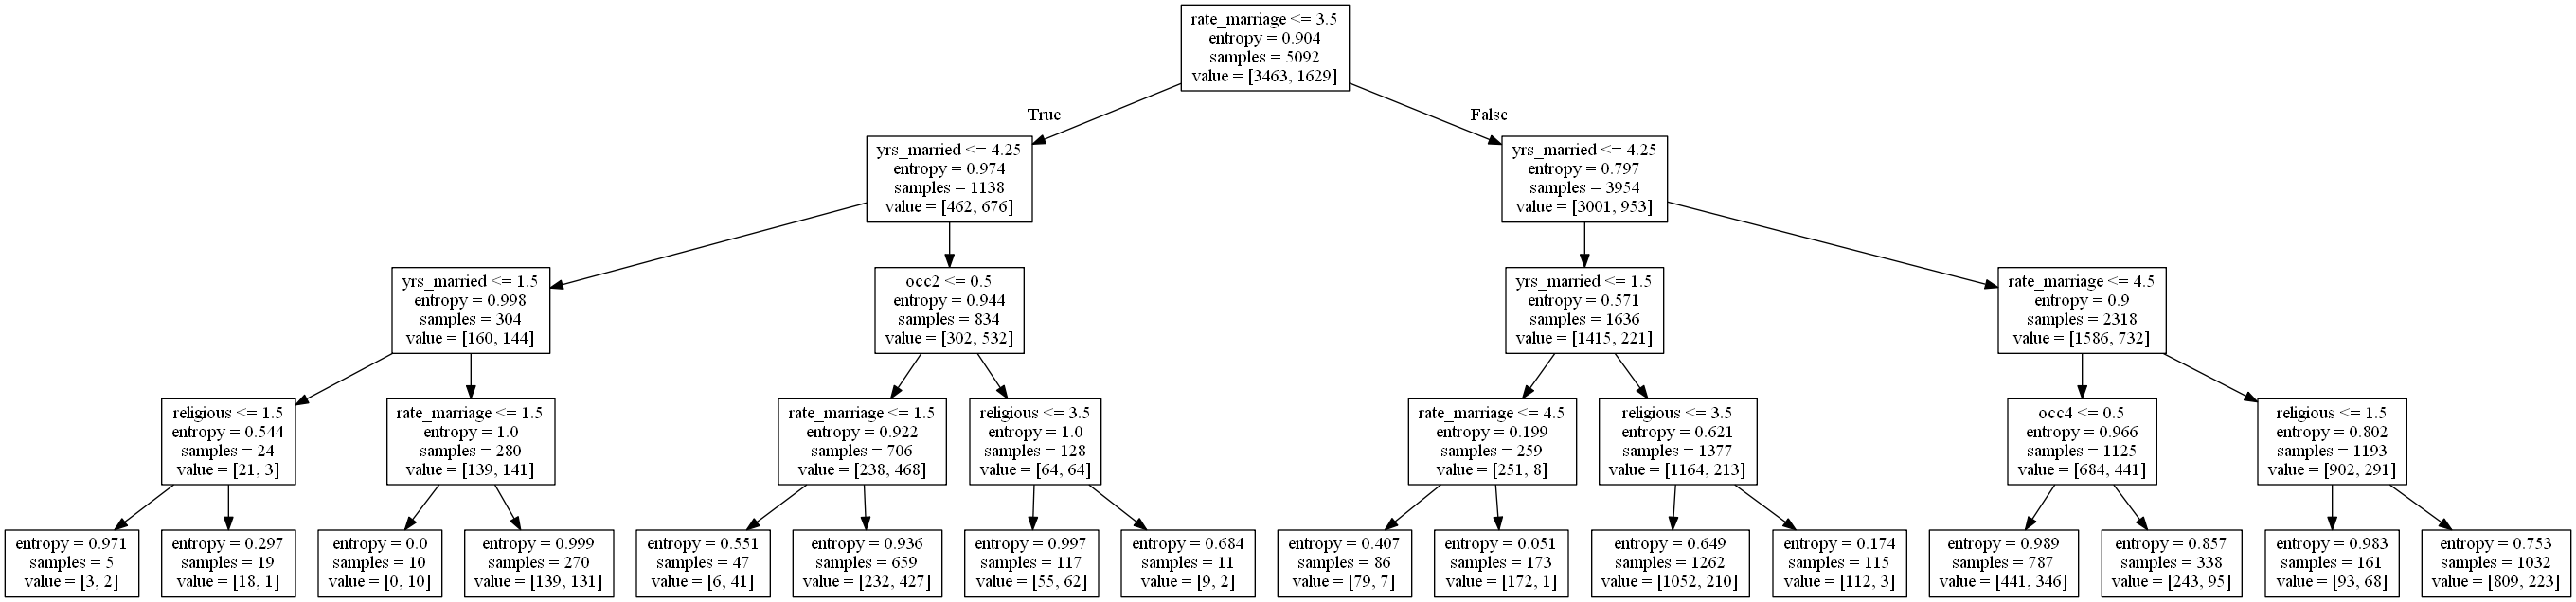

In [31]:
dot_data = StringIO()  

export_graphviz(model, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
 

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

Type your code here

In [32]:
model1 = DecisionTreeClassifier(max_depth=2, criterion= 'gini')
model1.fit(X_train, y_train)
model2 = DecisionTreeClassifier(max_depth=3, criterion= 'gini')
model2.fit(X_train, y_train)
model3 = DecisionTreeClassifier(max_depth=4, criterion= 'gini')
model3.fit(X_train, y_train)
# Then display all 3 trees

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

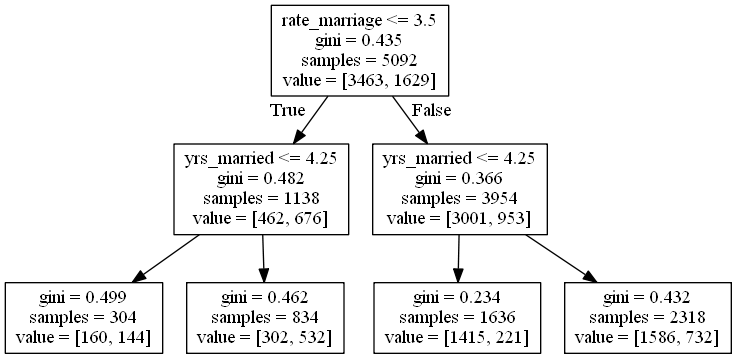

In [33]:
dot_data = StringIO()  

export_graphviz(model1, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
 

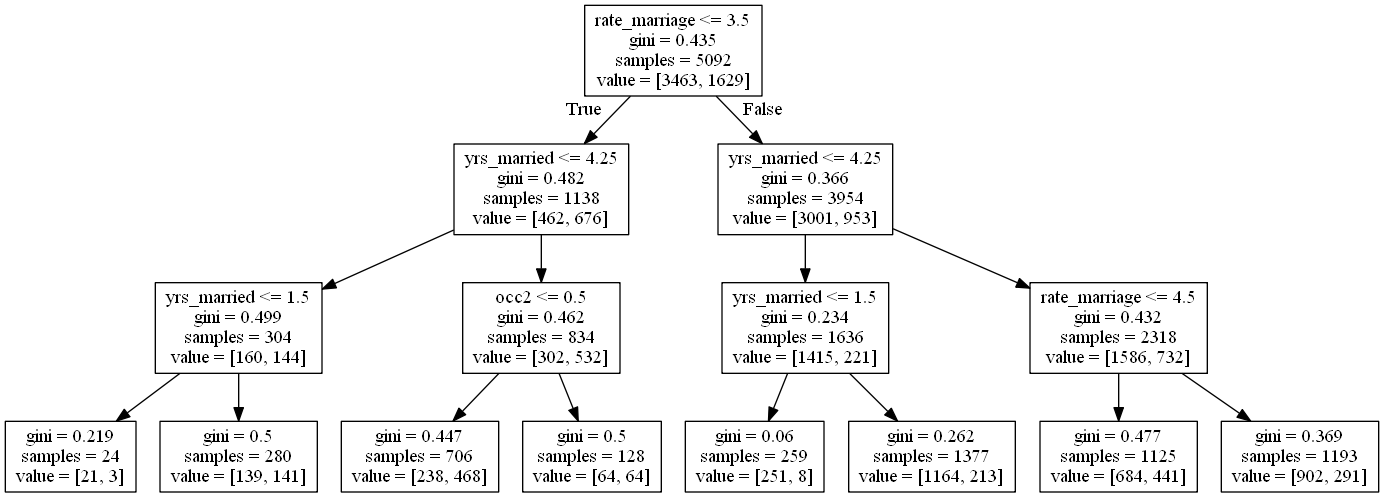

In [34]:
dot_data = StringIO()  

export_graphviz(model2, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
 

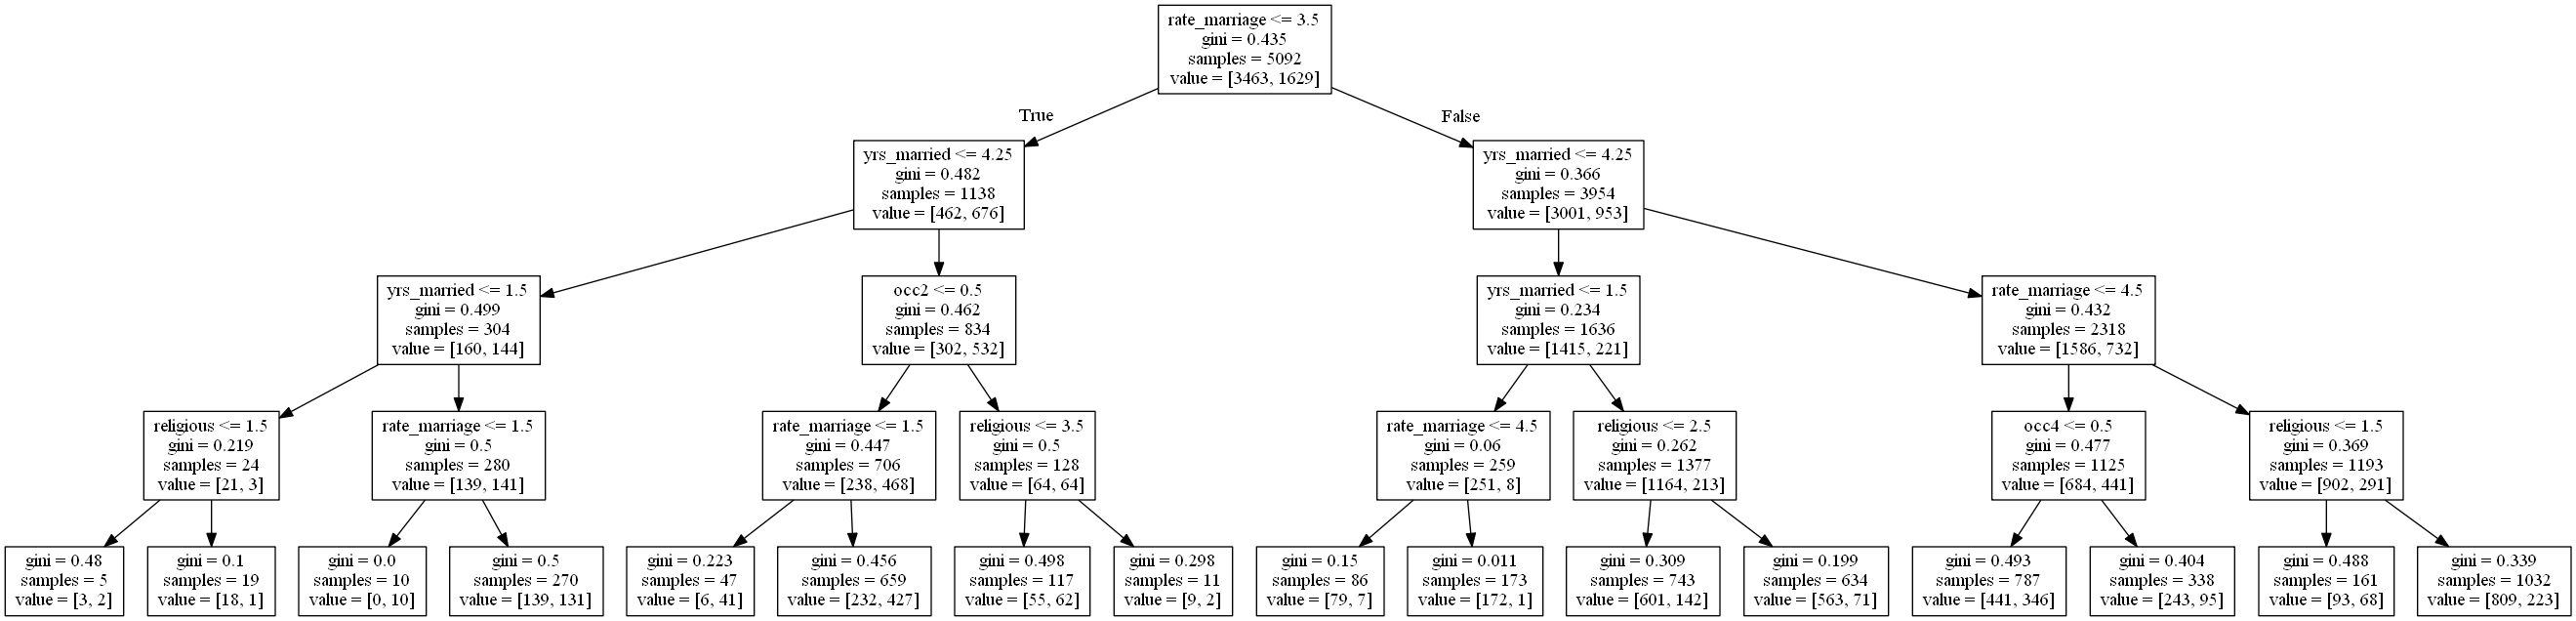

In [35]:
dot_data = StringIO()  

export_graphviz(model3, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
 

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.67      1274

0.707221350078493
